# Discogs Analysis


[Discogs Developer](https://www.discogs.com/developers/#page:home,header:home-quickstart)

[Download Discogs Data](https://data.discogs.com/)

[Discogs Database Search](https://www.discogs.com/developers/#page:database,header:database-search)

[Discogs Oauth](https://github.com/jesseward/discogs-oauth-example)

Need data on location of purchase

### Key Questions to answer:

* What is the profile of my record collection?

* What are the most expensive records and CDs I own?

* Which band/artist do I own the most and what is the cost of that?

* Which record label do I support the most and which did I spent the most?

* Which subgenre costs the most and which one is worth the most?

* Is there a difference between autographed and non-authographed records?

* What is the breakdown of the format and the cost, min price, median price, and max price?

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pandas_profiling
import seaborn as sns
#import cufflinks as cf
import plotly.offline
#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)
from pylab import rcParams
sns.set(rc={'figure.figsize':(16,6)})
plt.style.use('ggplot')

In [308]:
discogs_df = pd.read_csv('../data/discogs_data.csv')

In [309]:
discogs_df.head()

ID   Catalog#                    Artist                   Artist2  \
0   33    SD 8283                       Yes                       Yes   
1  165  RR 6583-1                  Mastodon                  Mastodon   
2  373    CS 8192  The Dave Brubeck Quartet  The Dave Brubeck Quartet   
3  142   SD 3-100                       Yes                       Yes   
4   18   SD 2-908                       Yes                       Yes   

                           Title            Label                    Format  \
0                  The Yes Album         Atlantic        LP, Album, RE, PR;   
1                      Remission  Relapse Records  2x12", Album, RE, RM, RP   
2                       Time Out         Columbia                 LP, Album   
3                       Yessongs         Atlantic               3xLP, Album   
4  Tales From Topographic Oceans         Atlantic          2xLP, Album, Gat   

   Rating  Released  release_id  ... Collection Media Condition  \
0     NaN      1971   7116823.0  ...                        NaN   
1     NaN      2017   8863478.0  ...                        NaN   
2     NaN      1961   2676016.0  ...                        NaN   
3     5.0      1973   8179158.0  ...                        NaN   
4     NaN      1973   8535940.0  ...                        NaN   

  Collection Sleeve Condition Collection Notes Collection Cost  \
0                         NaN              NaN             5.5   
1                         NaN              NaN            15.0   
2                         NaN              NaN            20.0   
3                         NaN              NaN             5.0   
4                         NaN              NaN             5.5   

  Collection Autographed   Min   Median     Max   Genre          Subgenre  
0                    NaN   2.25     3.87   10.00   Rock  Progressive Rock  
1                    NaN   7.99    21.67   30.19  Metal      Sludge Metal  
2                    NaN   5.07    26.50  130.00   Jazz              Jazz  
3                    NaN   3.95     9.99   20.00   Rock  Progressive Rock  
4                    NaN   7.99    13.49   20.00   Rock  Progressive Rock  

[5 rows x 22 columns]

In [310]:
# Drop columns
discogs_df = discogs_df.drop(columns=['Rating','Collection Media Condition', 
                                      'Collection Notes','Collection Sleeve Condition'])

In [311]:
discogs_df['Collection Autographed'] = discogs_df['Collection Autographed'].fillna('No')

In [312]:
profile = discogs_df.profile_report(title='Discogs Data Profiling Report',correlations={"cramers": False})

In [313]:
profile

In [314]:
discogs_df.describe()

ID     Released    release_id  Collection_Cost       _Min_  \
count  408.000000   408.000000  4.070000e+02       408.000000  392.000000   
mean   204.504902  2013.164216  7.330329e+06        18.528627   17.322449   
std    117.932184     7.567225  3.417850e+06        14.222461   22.008193   
min      1.000000  1961.000000  3.764730e+05         0.000000    0.860000   
25%    102.750000  2013.000000  4.823426e+06        12.000000    8.000000   
50%    204.500000  2015.000000  6.820328e+06        17.000000   14.980000   
75%    306.250000  2017.000000  9.817652e+06        23.000000   21.210000   
max    409.000000  2020.000000  1.473373e+07       232.000000  389.000000   

         _Median_       _Max_  
count  392.000000  392.000000  
mean    25.659311   38.255561  
std     29.396237   47.702644  
min      2.250000    2.990000  
25%     14.037500   20.000000  
50%     21.990000   29.260000  
75%     29.862500   40.000000  
max    514.170000  799.990000

## Plot boxplot of the `Collection_Cost`, `_Min_`, `_Median_`,`_Max_`

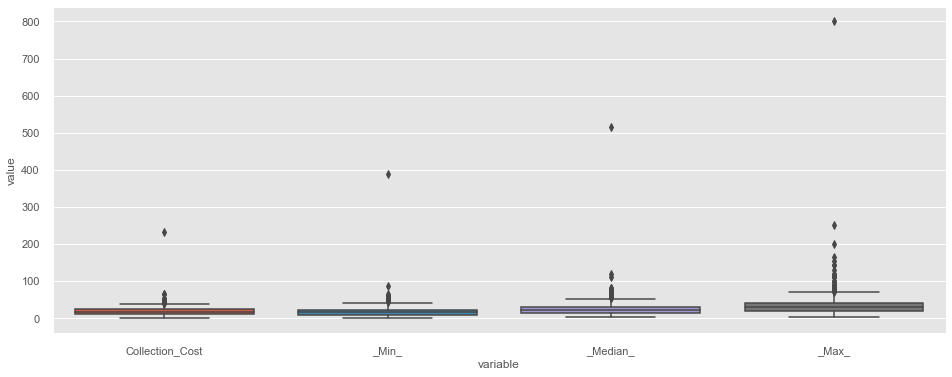

In [315]:
sns.boxplot(x="variable", y="value", data=pd.melt(discogs_df[['Collection_Cost','_Min_','_Median_','_Max_']]))

Remove outlier

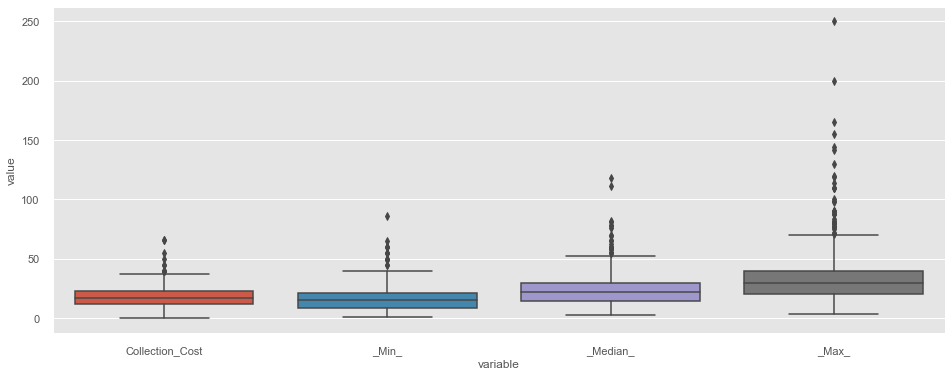

In [316]:
sns.boxplot(x="variable", y="value", data=pd.melt(discogs_df[['Collection_Cost','_Min_','_Median_','_Max_']][discogs_df.Collection_Cost < discogs_df['Collection_Cost'].max()]))

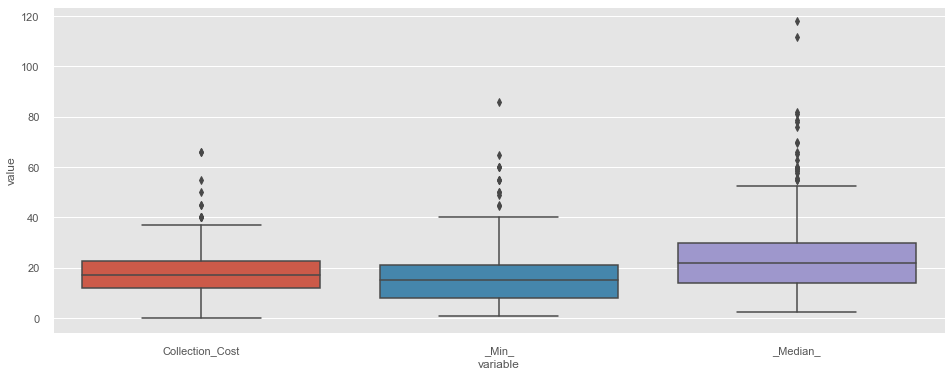

In [317]:
sns.boxplot(x="variable", y="value", data=pd.melt(discogs_df[['Collection_Cost','_Min_','_Median_']][discogs_df.Collection_Cost < discogs_df['Collection_Cost'].max()]))

In [318]:
discogs_df[['Collection_Cost','_Min_','_Median_','_Max_']].sum().reset_index()

index         0
0  Collection_Cost   7559.68
1            _Min_   6790.40
2         _Median_  10058.45
3            _Max_  14996.18

In [319]:
print('I spent $', discogs_df['Collection_Cost'].sum(),' on music that is recorded on Discogs. \n \nMy collection is worth $',discogs_df['_Median_'].sum())

I spent $ 7559.679999999999  on music that is recorded on Discogs. 
 
My collection is worth $ 10058.45


In [320]:
discogs_df[['Collection_Cost','_Min_','_Median_','_Max_']].mean().reset_index()

index          0
0  Collection_Cost  18.528627
1            _Min_  17.322449
2         _Median_  25.659311
3            _Max_  38.255561

In [321]:
print('I spent on averege $', discogs_df['Collection_Cost'].mean().round(2),' on per album that is recorded on Discogs. \n \nMy average collection is worth $',discogs_df['_Median_'].mean().round(2))

I spent on averege $ 18.53  on per album that is recorded on Discogs. 
 
My average collection is worth $ 25.66


## What is the most expensive record I bought?

In [322]:
max_cost = discogs_df[discogs_df['Collection_Cost']==discogs_df['Collection_Cost'].max()]
max_cost

ID           Catalog#     Artist    Artist2  \
302  187  NB 3446-5, 3446-5  Meshuggah  Meshuggah   

                            Title                         Label  \
302  25 Years Of Musical Deviance  Nuclear Blast, Nuclear Blast   

                                                Format  Released  release_id  \
302  Box, Comp, Ltd + 12", EP, RE, Cle + 2xLP, Albu...      2016   8808750.0   

    CollectionFolder     Date_Added  Collection_Cost Collection_Autographed  \
302            Vinyl  7/28/16 20:17            232.0                     No   

     _Min_  _Median_   _Max_  Genre Subgenre  
302  389.0    514.17  799.99  Metal    Djent

In [323]:
max_cost[['Artist','Title','Format','Collection_Cost','_Median_','Genre','Subgenre']]

Artist                         Title  \
302  Meshuggah  25 Years Of Musical Deviance   

                                                Format  Collection_Cost  \
302  Box, Comp, Ltd + 12", EP, RE, Cle + 2xLP, Albu...            232.0   

     _Median_  Genre Subgenre  
302    514.17  Metal    Djent

In [324]:
print('This record has 7 full length albums and 3 EPs plus a DVD and a lyric book')

This record has 7 full length albums and 3 EPs plus a DVD and a lyric book


The most expensive record I own is the Meshuggah - 25 Years Of Musical Deviance, Boxset.

## What is the least expensive record I own?

In [325]:
min_cost = discogs_df[discogs_df['Collection_Cost']==discogs_df['Collection_Cost'].min()]
min_cost

ID   Catalog#               Artist              Artist2     Title  \
87  189  Relic 009  Bunrage / Footpaths  Bunrage / Footpaths  Untitled   

          Label   Format  Released  release_id CollectionFolder  \
87  Haute Magie  LP, Cle      2012   3469073.0            Vinyl   

       Date_Added  Collection_Cost Collection_Autographed  _Min_  _Median_  \
87  6/18/16 13:22              0.0                     No    NaN       NaN   

    _Max_ Genre Subgenre  
87    NaN  Folk     Folk

In [326]:
min_cost[['Artist','Title','Format','Collection_Cost','_Median_','Genre','Subgenre']]

Artist     Title   Format  Collection_Cost  _Median_ Genre  \
87  Bunrage / Footpaths  Untitled  LP, Cle              0.0       NaN  Folk   

   Subgenre  
87     Folk

In [327]:
print('I got this record for free from a friend')

I got this record for free from a friend


## What is the least expensive record I bought?

In [328]:
purchased_df = discogs_df[discogs_df.Collection_Cost > 0]
min_purchase = purchased_df[purchased_df['Collection_Cost']==purchased_df['Collection_Cost'].min()]
min_purchase[['Artist','Title','Format','Collection_Cost','_Median_','Genre','Subgenre']]

Artist               Title       Format  Collection_Cost  _Median_  \
13   Whitesnake          Whitesnake    LP, Album              0.5      9.05   
17  Wyclef Jean  The Preacher's Son  2xLP, Promo              0.5      3.88   

      Genre      Subgenre  
13     Rock  Classic Rock  
17  Hip Hop       Hip Hop

I bought Wyclef Jean 2xLP at the basement of Dusty Groove for 50 cents.

## What are the top 10 bands with the most expensive records purchased?

In [329]:
record_sum   = discogs_df.groupby(['Artist2']).agg({
                       'Title': 'count',
                       'Label': 'nunique',
                       'Collection_Cost': 'sum',
                       '_Min_': 'sum',
                       '_Median_': 'sum',
                       '_Max_': 'sum'
                        }).reset_index().sort_values(by='_Median_',ascending=False)

## Plot top 10 bands that I purchased the most by cost

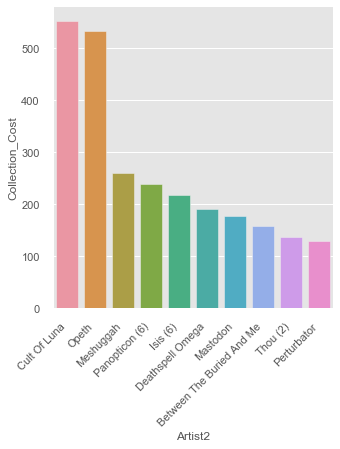

In [330]:
chart = sns.catplot(x="Artist2", y="Collection_Cost", kind="bar", 
                    data=record_sum.sort_values('Collection_Cost',ascending=False).head(10))
chart.set_xticklabels(rotation=45, horizontalalignment='right')
#record_sum.sort_values('Collection_Cost',ascending=False).head(10)

## What the most records purchased by the Top 10 bands?

Artist2  Title  Label  Collection_Cost   _Min_  \
105                      Opeth     19     13           533.00  419.55   
35                Cult Of Luna     16      7           552.75  390.58   
73                    Isis (6)     12      4           217.00  214.61   
111             Panopticon (6)     11      4           238.25  205.87   
15   Between The Buried And Me     10      2           157.50  234.89   
87                    Mastodon      9      5           177.00  124.95   
38            Deathspell Omega      9      3           190.00  152.34   
155                   Thou (2)      9      9           137.00  123.96   
80                    Krallice      6      2           126.00   93.87   
186                        Yes      6      1            28.00   21.82   

     _Median_    _Max_  
105    660.02  1013.97  
35     576.84   795.90  
73     317.39   492.03  
111    285.85   406.34  
15     333.08   544.67  
87     236.89   409.37  
38     215.67   355.69  
155    180.03   246.03  
80     135.20   143.58  
186     46.15   105.74

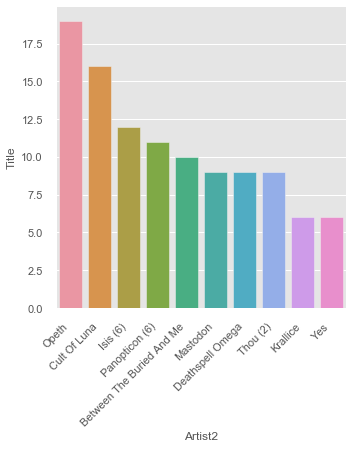

In [331]:
chart = sns.catplot(x="Artist2", y="Title", kind="bar", 
                    data=record_sum.sort_values('Title',ascending=False).head(10))
chart.set_xticklabels(rotation=45, horizontalalignment='right')

record_sum.sort_values('Title',ascending=False).head(10)

## What are the top 10 most valuable record by median?

Artist2                                     Title  \
302                  Meshuggah              25 Years Of Musical Deviance   
54                       Opeth  In Live Concert At The Royal Albert Hall   
202                    Leprous                                 Bilateral   
201                   Mastodon                                 Remission   
142                  Haken (2)                              The Mountain   
140  Between The Buried And Me                            The Anatomy Of   
203            Ne Obliviscaris                               Portal Of I   
141                      Opeth                                  Heritage   
86   Between The Buried And Me          The Parallax II: Future Sequence   
341            Yellow Eyes (2)                  Immersion Trench Reverie   

     Collection_Cost   _Min_  _Median_   _Max_  
302            232.0  389.00    514.17  799.99  
54              66.0   85.99    117.83  141.76  
202             40.0   50.00    111.52  155.02  
201             55.0   45.00     81.97  143.90  
142             22.0   64.84     81.20  109.88  
140             21.0   54.95     78.50  165.00  
203             30.0   50.00     77.81  250.00  
141             40.0   54.95     75.92  100.00  
86              30.0   60.00     70.00  113.64  
341             15.0   60.00     69.50   79.00

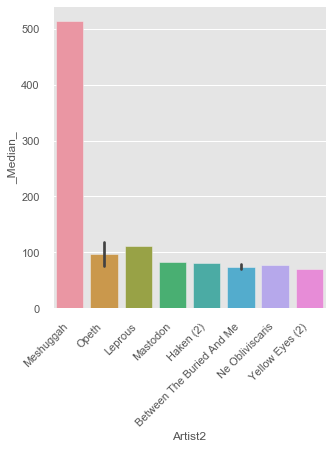

In [332]:
chart = sns.catplot(x="Artist2", y="_Median_", kind="bar", 
                    data=discogs_df.sort_values('_Median_',ascending=False).head(10))
chart.set_xticklabels(rotation=45, horizontalalignment='right')

discogs_df[['Artist2','Title','Collection_Cost',
            '_Min_','_Median_','_Max_']].sort_values('_Median_',ascending=False).head(10)

## What are the top 10 most valuable record by max?

Artist2                                     Title  \
302                  Meshuggah              25 Years Of Musical Deviance   
203            Ne Obliviscaris                               Portal Of I   
81                       Gorod                      A Perfect Absolution   
140  Between The Buried And Me                            The Anatomy Of   
202                    Leprous                                 Bilateral   
201                   Mastodon                                 Remission   
54                       Opeth  In Live Concert At The Royal Albert Hall   
2     The Dave Brubeck Quartet                                  Time Out   
248                      Opeth                   Deliverance & Damnation   
194                      Opeth                                 Watershed   

     Collection_Cost   _Min_  _Median_   _Max_  
302            232.0  389.00    514.17  799.99  
203             30.0   50.00     77.81  250.00  
81              12.0   19.99     48.05  199.98  
140             21.0   54.95     78.50  165.00  
202             40.0   50.00    111.52  155.02  
201             55.0   45.00     81.97  143.90  
54              66.0   85.99    117.83  141.76  
2               20.0    5.07     26.50  130.00  
248             36.0   33.03     58.44  119.99  
194             30.0   25.00     55.00  119.00

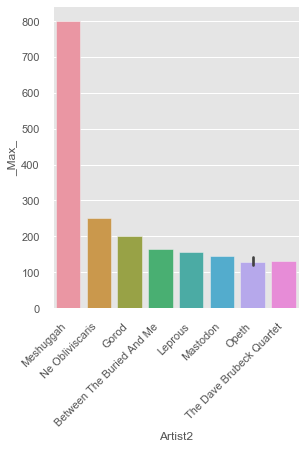

In [333]:
chart = sns.catplot(x="Artist2", y="_Max_", kind="bar", 
                    data=discogs_df.sort_values('_Max_',ascending=False).head(10))
chart.set_xticklabels(rotation=45, horizontalalignment='right')

discogs_df[['Artist2','Title','Collection_Cost',
            '_Min_','_Median_','_Max_']].sort_values('_Max_',ascending=False).head(10)

The Meshuggah boxset was sold for 514.17 and I bought it for 232.

## What are the Top 10 albums sold by average?

In [334]:
record_mean   = discogs_df.groupby(['Artist2']).agg({
                       'Title': 'count',
                       'Label': 'nunique',
                       'Collection_Cost': 'mean',
                       '_Min_': 'mean',
                       '_Median_': 'mean',
                       '_Max_': 'mean'
                        }).reset_index().sort_values(by='_Median_',ascending=False)

Artist2  Title  Label  Collection_Cost       _Min_  \
88               Meshuggah      2      1       130.000000  201.500000   
83                 Leprous      3      2        28.000000   42.586667   
96         Ne Obliviscaris      2      2        25.000000   37.000000   
150  The Contortionist (2)      4      3        20.625000   30.247500   
3         Altar Of Plagues      1      1        36.500000   40.000000   
56              Gojira (2)      1      1        30.000000   33.000000   
185        Yellow Eyes (2)      2      1        16.500000   41.995000   
31             Cloudkicker      1      1        15.000000   30.000000   
171             Vildhjarta      2      2        17.500000   25.495000   
12                Baroness      3      2        17.543333   29.680000   

       _Median_       _Max_  
88   273.335000  419.990000  
83    67.493333   95.106667  
96    54.520000  144.230000  
150   54.057500   68.232500  
3     49.990000   82.050000  
56    48.490000   65.000000  
185   47.075000   52.495000  
31    46.980000   55.000000  
171   46.385000   59.990000  
12    45.973333   66.583333

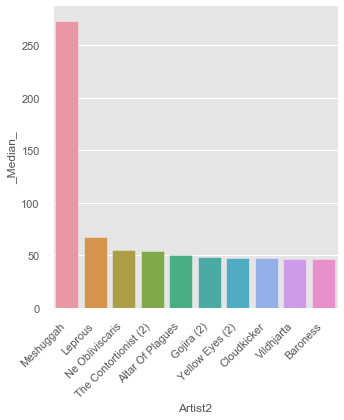

In [335]:
chart = sns.catplot(x="Artist2", y="_Median_", kind="bar", 
                    data=record_mean.sort_values('_Median_',ascending=False).head(10))
chart.set_xticklabels(rotation=45, horizontalalignment='right')
record_mean.sort_values('_Median_',ascending=False).head(10)

## What are the Top 10 albums sold by max?

Artist2  Title  Label  Collection_Cost       _Min_  \
88                  Meshuggah      2      1          130.000  201.500000   
96            Ne Obliviscaris      2      2           25.000   37.000000   
151  The Dave Brubeck Quartet      1      1           20.000    5.070000   
58                      Gorod      2      1           14.000   15.995000   
83                    Leprous      3      2           28.000   42.586667   
3            Altar Of Plagues      1      1           36.500   40.000000   
1                    Agalloch      1      1           30.000   16.000000   
41                 Devourment      1      1           13.630   20.000000   
23             Carpenter Brut      1      1           36.000   32.610000   
150     The Contortionist (2)      4      3           20.625   30.247500   

       _Median_       _Max_  
88   273.335000  419.990000  
96    54.520000  144.230000  
151   26.500000  130.000000  
58    35.275000  114.990000  
83    67.493333   95.106667  
3     49.990000   82.050000  
1     35.000000   70.650000  
41    31.000000   69.990000  
23    35.850000   69.980000  
150   54.057500   68.232500

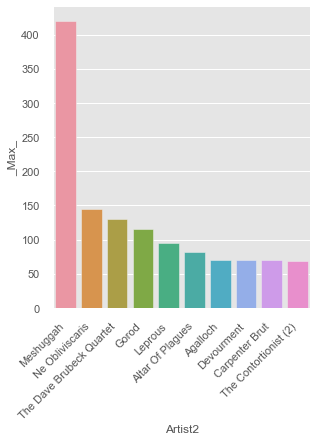

In [336]:
chart = sns.catplot(x="Artist2", y="_Max_", kind="bar", 
                    data=record_mean.sort_values('_Max_',ascending=False).head(10))
chart.set_xticklabels(rotation=45, horizontalalignment='right')
record_mean.sort_values('_Max_',ascending=False).head(10)

In [337]:
discogs_df[['Artist2','Title','Collection_Cost','_Min_','_Median_','_Max_']][discogs_df.Artist2 == 'Opeth'].sort_values('_Max_',ascending=False)

Artist2                                              Title  \
54    Opeth           In Live Concert At The Royal Albert Hall   
248   Opeth                            Deliverance & Damnation   
194   Opeth                                          Watershed   
141   Opeth                                           Heritage   
254   Opeth                                      Book Of Opeth   
131   Opeth                                        Morningrise   
32    Opeth                                             Orchid   
238   Opeth                               The Roundhouse Tapes   
33    Opeth                               My Arms, Your Hearse   
273   Opeth       Lamentations Live At Shepherd's Bush Empire    
52    Opeth                                    Blackwater Park   
187   Opeth                                     Pale Communion   
122   Opeth                                     Ghost Reveries   
277   Opeth                                          Sorceress   
82    Opeth                                         Still Life   
21    Opeth  Lamentations - Live At Shepherd's Bush Empire ...   
48    Opeth                               The Roundhouse Tapes   
399   Opeth                                   In Cauda Venenum   
400   Opeth                                   In Cauda Venenum   

     Collection_Cost  _Min_  _Median_   _Max_  
54              66.0  85.99    117.83  141.76  
248             36.0  33.03     58.44  119.99  
194             30.0  25.00     55.00  119.00  
141             40.0  54.95     75.92  100.00  
254             50.0   6.57     59.28   97.80  
131              6.0  26.00     35.00   65.21  
32              22.0  19.47     32.61   43.48  
238             30.0  20.00     26.26   42.50  
33               6.0  20.00     33.33   41.11  
273             30.0  15.05     28.05   39.98  
52              31.0  26.19     31.99   39.98  
187             29.0  18.89     20.55   33.32  
122             40.0  20.00     24.98   32.18  
277             20.0  18.67     24.00   31.00  
82              32.0  20.31     21.18   30.99  
21               6.0   4.99      6.40   19.00  
48               9.0   4.44      9.20   16.67  
399             25.0    NaN       NaN     NaN  
400             25.0    NaN       NaN     NaN

# Label Analysis

In [338]:
label_sum   = discogs_df.groupby(['Label']).agg({
                       'Artist2': 'nunique',
                       'Title': 'count',
                       'Collection_Cost': 'sum',
                       '_Min_': 'sum',
                       '_Median_': 'sum',
                       '_Max_': 'sum'
                        }).reset_index().sort_values(by='_Median_',ascending=False)
label_sum.head()

Label  Artist2  Title  Collection_Cost   _Min_  \
113               Relapse Records       13     23           451.27  374.98   
104  Nuclear Blast, Nuclear Blast        3      4           289.50  427.74   
23                  Century Media       10     17           346.00  275.26   
17                Blood Music (2)        5      9           260.00  268.74   
109            Prosthetic Records        6     13           221.00  164.36   

     _Median_   _Max_  
113    591.73  943.35  
104    579.53  885.80  
23     458.06  650.54  
17     429.77  748.10  
109    271.41  391.61

## What labels did I spend the most?

Label  Artist2  Title  Collection_Cost  \
113                          Relapse Records       13     23           451.27   
23                             Century Media       10     17           346.00   
104             Nuclear Blast, Nuclear Blast        3      4           289.50   
17                           Blood Music (2)        5      9           260.00   
41                                   Earache        4      9           230.74   
109                       Prosthetic Records        6     13           221.00   
66                          Indie Recordings        1      5           175.00   
52                              Gilead Media        4      9           172.50   
1                               20 Buck Spin        8     10           169.00   
91   Nordvis Produktion, Bindrune Recordings        3      7           164.00   

      _Min_  _Median_   _Max_  
113  374.98    591.73  943.35  
23   275.26    458.06  650.54  
104  427.74    579.53  885.80  
17   268.74    429.77  748.10  
41   160.17    260.32  319.41  
109  164.36    271.41  391.61  
66   124.12    170.59  269.45  
52   200.85    260.41  300.35  
1    134.06    200.41  267.73  
91   170.63    214.93  296.49

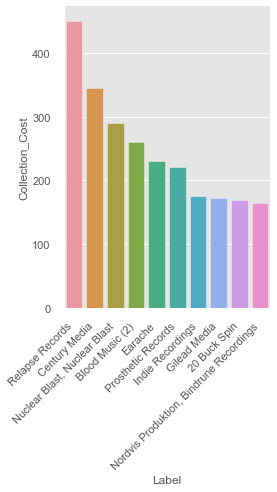

In [339]:
chart = sns.catplot(x="Label", y="Collection_Cost", kind="bar", 
                    data=label_sum.sort_values('Collection_Cost',ascending=False).head(10))
chart.set_xticklabels(rotation=45, horizontalalignment='right')
label_sum.sort_values('Collection_Cost',ascending=False).head(10)

In [340]:
discogs_df.columns

Index(['ID', 'Catalog#', 'Artist', 'Artist2', 'Title', 'Label', 'Format',
       'Released', 'release_id', 'CollectionFolder', 'Date_Added',
       'Collection_Cost', 'Collection_Autographed', '_Min_', '_Median_',
       '_Max_', 'Genre', 'Subgenre'],
      dtype='object')

In [341]:
discogs_df.Date_Added = pd.to_datetime(discogs_df.Date_Added).dt.strftime('%m/%Y')
discogs_df.Date_Added.head()

0    07/2019
1    12/2016
2    05/2014
3    04/2017
4    02/2020
Name: Date_Added, dtype: object

In [342]:
time_df  = discogs_df.groupby(['Released','Date_Added']).agg({
                               'Collection_Cost': 'sum',
                               '_Min_': 'sum',
                               '_Median_': 'sum',
                               '_Max_': 'sum'
                                }).reset_index().sort_values(by='Date_Added',ascending=True)
time_df.head()

Released Date_Added  Collection_Cost   _Min_  _Median_   _Max_
60       2012    01/2014            12.00    4.66     12.05   19.69
73       2013    01/2014            68.00  106.05    161.86  223.85
48       2011    01/2014             8.00    8.86     11.09   15.38
92       2014    01/2015            52.00   28.50     72.73   95.91
127      2016    01/2016            20.72   16.56     23.66   33.00

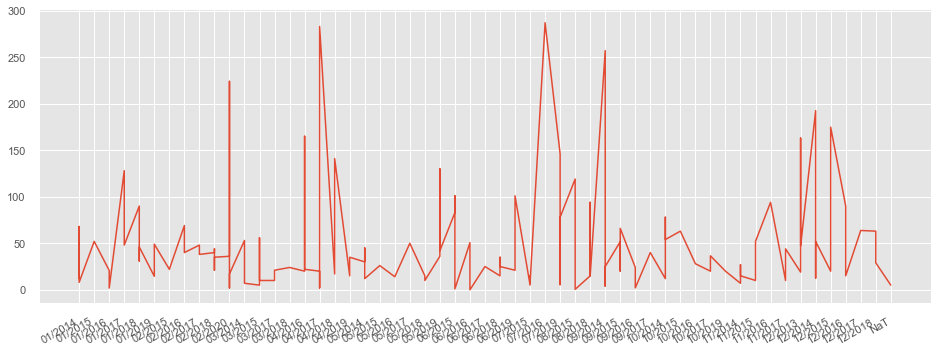

In [343]:
plt.plot(time_df['Date_Added'], time_df['Collection_Cost'])
plt.gcf().autofmt_xdate()
plt.show()

In [344]:
year_df  = discogs_df.groupby(['Released']).agg({
                               'Artist2': 'count',
                               'Title': 'count',
                               'Collection_Cost': 'sum',
                               '_Min_': 'sum',
                               '_Median_': 'sum',
                               '_Max_': 'sum'
                                }).reset_index().sort_values(by='Released',ascending=True)
year_df.head()

Released  Artist2  Title  Collection_Cost  _Min_  _Median_   _Max_
0      1961        1      1             20.0   5.07     26.50  130.00
1      1971        1      1              5.5   2.25      3.87   10.00
2      1973        2      2             10.5  11.94     23.48   40.00
3      1974        1      1              4.0   1.13      7.00   30.74
4      1975        1      1             12.0  10.00     17.00   25.00

In [345]:
year_df['Released'].describe()

count      32.0000
mean     1998.2500
std        17.5683
min      1961.0000
25%      1979.7500
50%      2004.5000
75%      2012.2500
max      2020.0000
Name: Released, dtype: float64

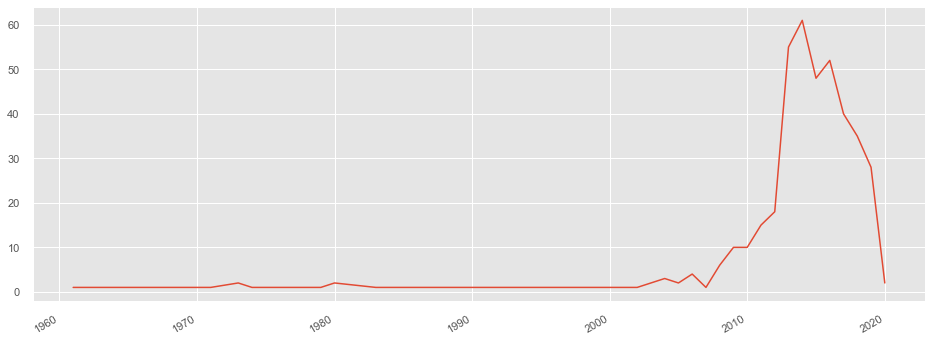

In [346]:
plt.plot(year_df['Released'], year_df['Title'])
plt.gcf().autofmt_xdate()
plt.show()

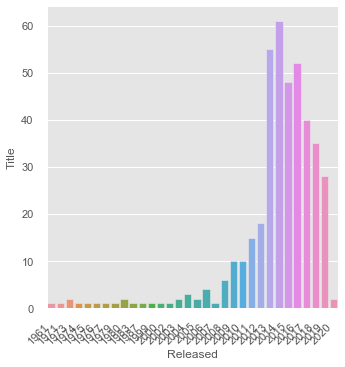

In [347]:
chart = sns.catplot(x="Released", y="Title", kind="bar", 
                    data=year_df.sort_values('Released',ascending=True))
chart.set_xticklabels(rotation=45, horizontalalignment='right')

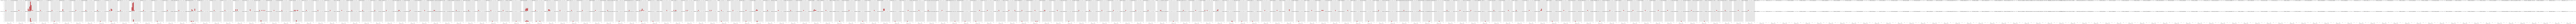

In [349]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
bins = np.arange(0, 65, 5)
g = sns.FacetGrid(discogs_df, col="Format",  row="Collection_Autographed")
g = g.map(plt.hist, "Collection_Cost", bins=bins, color="r")

In [352]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1076)>